# HW_03 - Nonlinear solutions

![hanging chain variational solution](https://campuspro-uploads.s3.us-west-2.amazonaws.com/2f97aca3-fc59-4d60-903d-2957cdab1812/aec6660b-716d-4530-ac9a-ee080b56d7c3/08_hanging.png)

Creating a solution for the hanging chain, we reached a point where the constants required a nonlinear solution to an algebraic equation, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


ModuleNotFoundError: No module named 'matplotlib'

1. $y(x) = \cosh \frac{\rho g a}{2c} - \cosh\frac{\rho g x}{c}$
2. $L = \int_{-a/2}^{a/2}\cosh\frac{\rho g x}{c}dx \rightarrow L = \frac{c}{\rho g} \sinh\frac{\rho g a}{c}$

The second equation does not have an "analytical" solution. Where "analytical" refers to an equation with seperable input/output. What you need is a "numerical" solution to equation 2:

what $c$ will satisfy this equation?

$f(c)=L - \frac{c}{\rho g} \sinh\frac{\rho g a}{c}=0$

These problems often come up when engineering systems have large displacements or large rotations that cannot be ignored. One way to approach this problem is to _guess_ the solution. You could try:

|c=|f(c)|
|---|---|
|c=0|$-\infty$|
|c=50|-0.022|
|c=100|0.07|
|c=200|0.09|

If you happen to guess numbers that change the sign of $f(c)$, then you know one interval where $f(c_{solution})=0$ must have been true. I find it helps to plot the function to see where the solution may exist

Text(0, 0.5, 'f(c)')

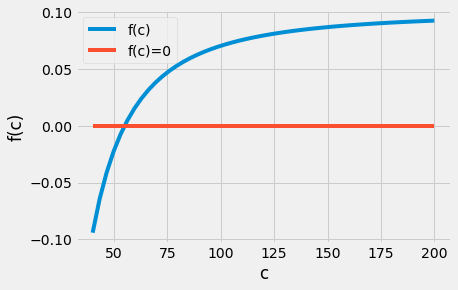

In [47]:
g = 9.81
L = 1
a = 0.9
rho = 5
F = lambda c: L-c/rho/g*np.sinh(rho*g*a/c)
c = np.linspace(40,200)
plt.plot(c,F(c), label='f(c)')
plt.plot(c,np.zeros(c.shape), label='f(c)=0')
plt.legend()
plt.xlabel('c')
plt.ylabel('f(c)')

## Numerical solution
We can use [`fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to automate the guess-and-check method. You need 2 things:

1. a function `f(c)` that returns the result $f(c)=L - \frac{c}{\rho g} \sinh\frac{\rho g a}{c}=0$
2. an initial guess, `c_0`

Numerical solutions always require an initial guess for the solution and they will iterate until your function `f(c_sol)` $\approx0$. 

> __Note__: `fsolve` has more advanced features than 'guess-and-check', but at its core it uses algorithms to reduce the number of guesses and checks. 

### Define `f(c)` with `lambda`

In Python, you can use the [`lambda`](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) function to create functions in one line. The other way to create a function is using [`def`](https://docs.python.org/3/tutorial/controlflow.html#defining-functions). 

> __Note__: `def` is a much richer way to create functions in Python. We will use it later when we want more involved functions. 

Here, you define the function `f(c)` with `lambda`:

In [60]:
g = 9.81
L = 1
a = 0.7
rho = 5

f = lambda c: L-c/rho/g*np.sinh(rho*g*a/c)

In [61]:
f(40)

0.21081614830202033

### Solve `f(c_sol)=0` with `fsolve`

The numerical solver, `fsolve`, is part of the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) library. Import the function with the `from`...`import`-command. 

In [62]:
from scipy.optimize import fsolve

Now, you can solve for the value of `c_sol` that creates a solution to `f(c_sol)=0`. Use the function, `f` and an initial guess, `c0=40`. 

In [63]:
c0 = 40
c_sol = fsolve(f, c0)

print('c_sol = {} and f(c_sol) = {}'.format(c_sol[0], f(c_sol)))

c_sol = 22.671522641015084 and f(c_sol) = [1.62092562e-14]


## Plug into catenary equation

Now, you have a solution for $c$ that describes the hanging chain. Plug it into the original equation 

1. $y(x) = \cosh \frac{\rho g a}{2c} - \cosh\frac{\rho g x}{c}$

and plot the final shape. 

In [64]:
x = np.linspace(-0.9/2,0.9/2)
y = np.cosh(9.81*5*0.9/2/c_sol[0])-np.cosh(9.81*5*x/c_sol[0])

Text(0, 0.5, 'y(x) - chain location (m)')

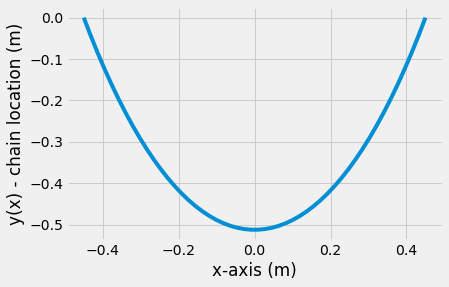

In [65]:
plt.plot(x,-y)
plt.xlabel('x-axis (m)')
plt.ylabel('y(x) - chain location (m)')

## Problem 1

Plot the solution for two hanging chains, the same as we did above:

$g = 9.81~m/s/s$
$L = 1~m$
$rho = 5~kg/m$

1. $a = 0.9~m$
2. $a = 0.7~m$

## Problem 2

![four-bar linkage design](../images/4bar.svg)

In the four-bar linkage show above there are 3 bodies moving in 2D (9 DOF) and 4 pins (8 constraints). The linkage configuration is constrained by the two nonlinear equations

1. $l_1\sin\theta_1+l_2\sin\theta_2-l_3\sin\theta_3 -d_y = 0$
2. $l_1\cos\theta_1+l_2\cos\theta_2-l_3\cos\theta_3 -d_x = 0$

If you have one of the angles,$\theta_1$, you can use equations 1 and 2 to solve for the other two angles, $\theta_2~and\theta_3$ using `fsolve` only now the input is a vector with two values and the output is a vector with two values. 

$\bar{f}(\bar{x})= \left[\begin{array}{c}
f_1(\theta_2,~\theta_3) \\ 
f_2(\theta_2,~\theta_3)\end{array}\right]=\left[\begin{array}{c}
l_1\sin\theta_1+l_2\sin\theta_2-l_3\sin\theta_3 -d_y\\
l_1\cos\theta_1+l_2\cos\theta_2-l_3\cos\theta_3 -d_x
\end{array}\right]$

The linkage system has the following properties:

- link 1: $l_1 = 0.5~m$
- link 2: $l_2 = 1~m$
- link 3: $l_3 = 1~m$

when $\theta_1=90^o$, $\theta_2=0^o$, and $\theta_3=90^o$. So the two grounded pins have a fixed relative position, $r_{3/1} = d_x\hat{i}+d_y\hat{j} = 1\hat{i}-0.5\hat{j}$. 

Below, the definition of `Fbar` is defined for $\bar{f}(\bar{x})$ and the function is satisfied for $\theta_1=\theta_3=90^o$ and $\theta_2=0^o$. Then, the links are plotted with `rx` and `ry`, where

* $rx = \left[\begin{array}~0\\l_1\cos(\theta_1)\\l_1\cos(\theta_1)+l_2\cos(\theta_2)\\ l_1\cos(\theta_1) + l_2\cos(\theta_2)-l_3\cos(\theta_3)\end{array}\right]$
* $ry = \left[\begin{array}~0\\l_1\sin(\theta_1)\\l_1\sin(\theta_1)+l_2\sin(\theta_2)\\ l_1\sin(\theta_1)+l_2\sin(\theta_2)-l_3\sin(\theta_3)\end{array}\right]$

In [66]:
l1 = 0.5
l2 = 1
l3 = 1
a1 = np.pi/2
dy = -0.5
dx = 1
Fbar = lambda x: np.array([l1*np.sin(a1)+l2*np.sin(x[0])-l3*np.sin(x[1])-dy,
                           l1*np.cos(a1)+l2*np.cos(x[0])-l3*np.cos(x[1])-dx])

In [67]:
x90 = np.array([0,np.pi/2]) 
Fbar(x90)

array([ 0.00000000e+00, -1.11022302e-16])

(-0.5, 1.5, -0.6, 0.6)

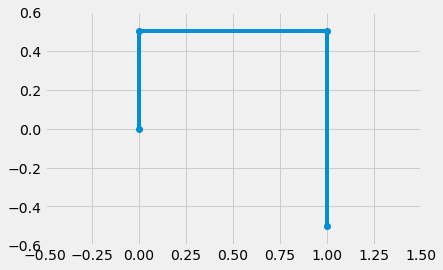

In [68]:
rx = np.array([0,
               l1*np.cos(a1),
               l1*np.cos(a1)+l2*np.cos(x90[0]), 
               l1*np.cos(a1)+l2*np.cos(x90[0])-l3*np.cos(x90[1])])
ry = np.array([0,
               l1*np.sin(a1),
               l1*np.sin(a1)+l2*np.sin(x90[0]), 
               l1*np.sin(a1)+l2*np.sin(x90[0])-l3*np.sin(x90[1])])

plt.plot(rx,ry,'o-')
plt.axis([-0.5, 1.5, -0.6, 0.6])

### __Your goal:__ 

Change the angle to $\theta_1=45^o,~135^o,~and~180^o$. Plot the three configurations like above. Use `fsolve` to find $\theta_2~and~\theta_3$. 

In [ ]:
# your work here